# Sistema Predictivo de Accidentes de Tránsito mediante IA
## Objetivo del Proyecto
Aplicar los conocimientos y habilidades adquiridos en el curso SIC para desarrollar un modelo predictivo de inteligencia artificial (IA)implementando algoritmos de Machine Learning, como Random Forest y KNN para estimar la probabilidad de que en un accidente de tránsito haya personas heridas partir de datos históricos esto con el objetivo de mejorar la precisión en la identificación de patrones y factores de riesgo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')


## Analisis Descriptivo de los datos

In [2]:
data = pd.read_csv('traffic_accidents.csv')
df = data.copy()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [4]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [6]:
sns.set(style="whitegrid", palette="muted")

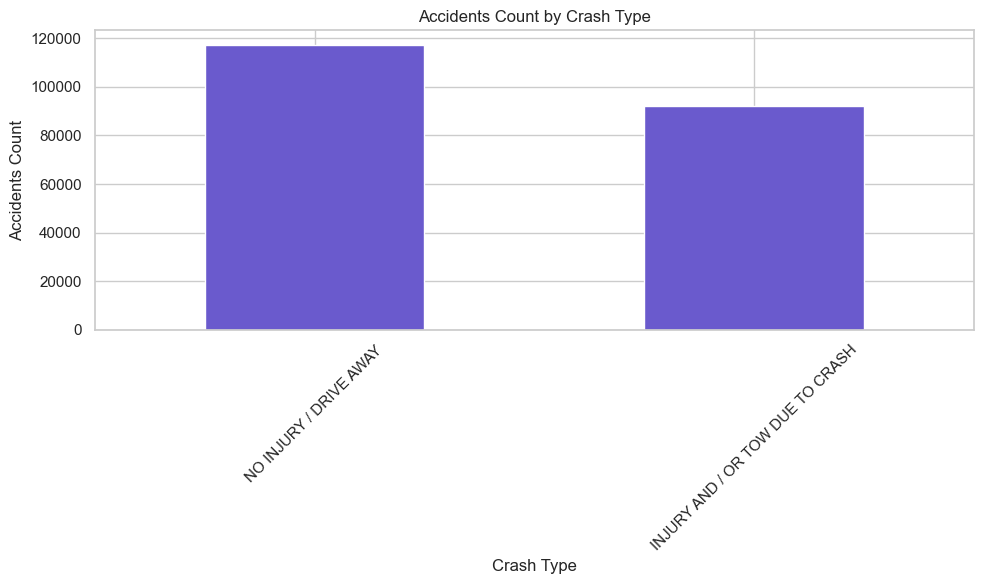

In [7]:

accidents_by_type = df['crash_type'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='slateblue')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
df = df.drop(columns=['crash_date'])
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
   
    original_values = df[column].unique()
    
 
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")



traffic_control_device Encoding and Decoding:
16 -> TRAFFIC SIGNAL
4 -> NO CONTROLS
15 -> STOP SIGN/FLASHER
17 -> UNKNOWN
6 -> OTHER
10 -> PEDESTRIAN CROSSING SIGN
9 -> OTHER WARNING SIGN
18 -> YIELD
2 -> FLASHING CONTROL SIGNAL
3 -> LANE USE MARKING
8 -> OTHER REG. SIGN
1 -> DELINEATORS
14 -> SCHOOL ZONE
11 -> POLICE/FLAGMAN
5 -> NO PASSING
13 -> RR CROSSING SIGN
12 -> RAILROAD CROSSING GATE
0 -> BICYCLE CROSSING SIGN
7 -> OTHER RAILROAD CROSSING

weather_condition Encoding and Decoding:
2 -> CLEAR
7 -> RAIN
10 -> SNOW
3 -> CLOUDY/OVERCAST
11 -> UNKNOWN
4 -> FOG/SMOKE/HAZE
1 -> BLOWING SNOW
5 -> FREEZING RAIN/DRIZZLE
6 -> OTHER
9 -> SLEET/HAIL
8 -> SEVERE CROSS WIND GATE
0 -> BLOWING SAND, SOIL, DIRT

lighting_condition Encoding and Decoding:
3 -> DAYLIGHT
1 -> DARKNESS, LIGHTED ROAD
4 -> DUSK
0 -> DARKNESS
5 -> UNKNOWN
2 -> DAWN

first_crash_type Encoding and Decoding:
17 -> TURNING
10 -> REAR END
0 -> ANGLE
2 -> FIXED OBJECT
11 -> REAR TO FRONT
15 -> SIDESWIPE SAME DIRECTION
14 -> 

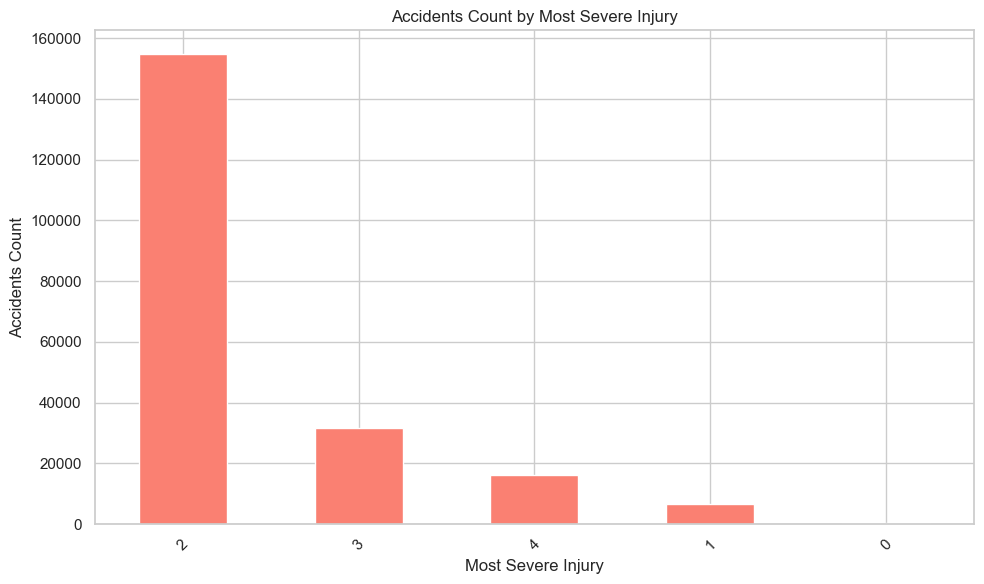

In [9]:
# graph the count of accdents by most_severe_injury
accidents_by_severity = df['most_severe_injury'].value_counts()
plt.figure(figsize=(10,6))
accidents_by_severity.plot(kind='bar', color='salmon')
plt.title('Accidents Count by Most Severe Injury')
plt.xlabel('Most Severe Injury')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Remover caracteristicas no informativas

In [10]:
df = df.drop(columns=['most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication',"crash_month"])

In [11]:

X = df.drop(columns=['crash_type'])
y = df['crash_type']



## Normalizacion

In [12]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_control_device,209306.0,1.979822e-16,1.000002,-3.359047,0.234215,0.473766,0.473766,0.952868
weather_condition,209306.0,-3.693494e-17,1.000002,-1.264449,-0.456844,-0.456844,-0.456844,3.177381
lighting_condition,209306.0,1.911926e-16,1.000002,-2.268795,-1.337901,0.523888,0.523888,2.385676
first_crash_type,209306.0,-3.102807e-17,1.000002,-1.454593,-1.268043,0.037807,1.082487,1.082487
trafficway_type,209306.0,-9.967003e-17,1.000002,-1.937563,-0.249266,0.313500,0.313500,3.408711
alignment,209306.0,8.102603e-16,1.000002,-15.681941,-0.057009,-0.057009,-0.057009,10.359613
roadway_surface_cond,209306.0,-6.898144e-17,1.000002,-0.571385,-0.571385,-0.571385,-0.154831,1.927937
road_defect,209306.0,2.498540e-17,1.000002,-1.119708,-0.460164,-0.460164,-0.460164,2.837554
intersection_related_i,209306.0,-1.838939e-16,1.000002,-4.468595,0.223784,0.223784,0.223784,0.223784
damage,209306.0,-1.488261e-16,1.000002,-2.425352,-0.913779,0.597795,0.597795,0.597795


## Correlación de caracteristicas

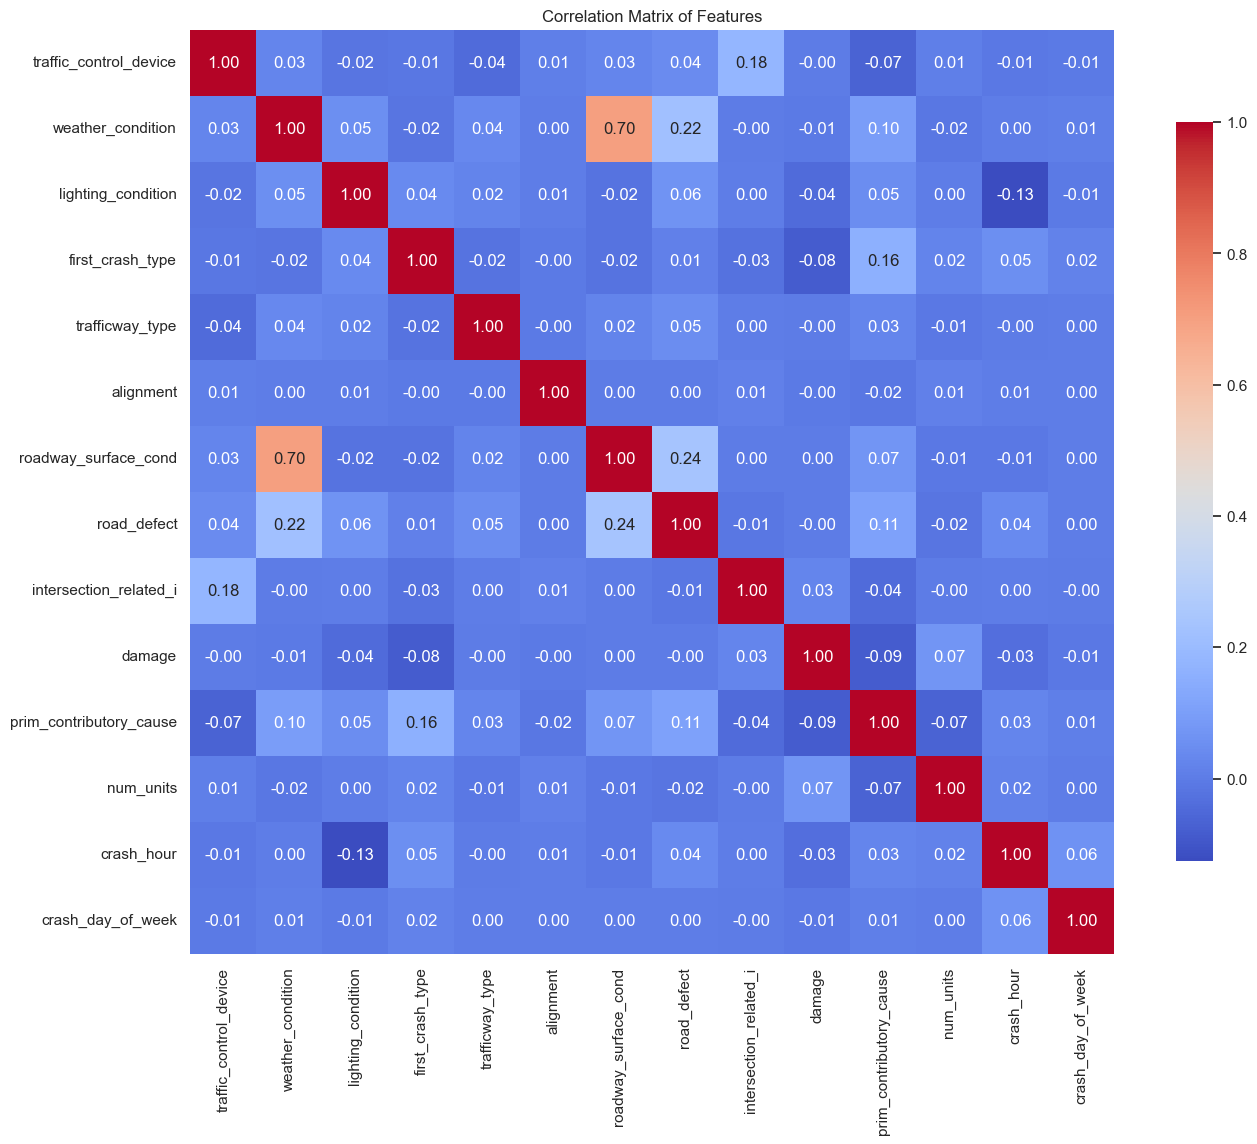

In [13]:
# Get correlation matrix
correlation_matrix = X.corr()
# Plotting the correlation matrix
plt.figure(figsize=(16, 12))  # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.show()

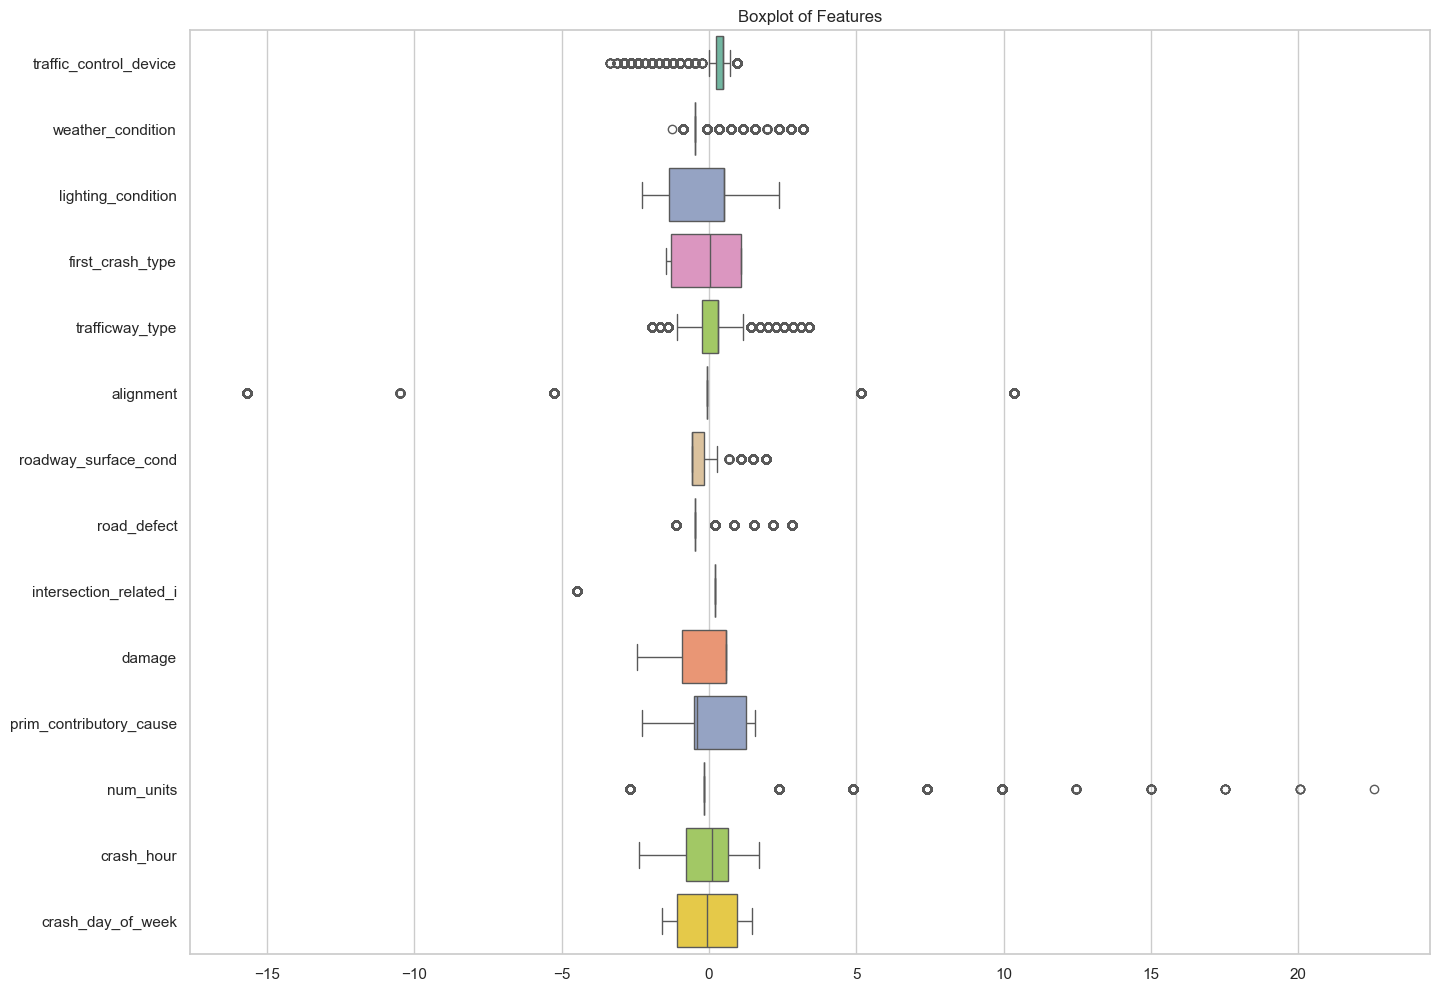

In [14]:
#Boxplot to found outliers
plt.figure(figsize=(16, 12))
sns.boxplot(data=X, orient="h", palette="Set2")
plt.title('Boxplot of Features')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrenamiento de Modelos

In [16]:



param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

rf_model = grid_search.best_estimator_

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7405761788734413
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70     18381
           1       0.77      0.77      0.77     23481

    accuracy                           0.74     41862
   macro avg       0.74      0.74      0.74     41862
weighted avg       0.74      0.74      0.74     41862

Confusion Matrix:
[[12904  5477]
 [ 5383 18098]]


In [17]:

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

dt_model = grid_search_dt.best_estimator_

y_pred_dt = dt_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.7326692465720701
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70     18381
           1       0.77      0.75      0.76     23481

    accuracy                           0.73     41862
   macro avg       0.73      0.73      0.73     41862
weighted avg       0.73      0.73      0.73     41862

Confusion Matrix:
[[13144  5237]
 [ 5954 17527]]


In [18]:

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

knn_model = grid_search_knn.best_estimator_

y_pred_knn = knn_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.6831732836462663
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     18381
           1       0.71      0.74      0.72     23481

    accuracy                           0.68     41862
   macro avg       0.68      0.68      0.68     41862
weighted avg       0.68      0.68      0.68     41862

Confusion Matrix:
[[11213  7168]
 [ 6095 17386]]


In [19]:
param_grid_mlp = {
    'hidden_layer_sizes': [(25,), (50,), (25, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
mlp_model = grid_search_mlp.best_estimator_
y_pred_mlp = mlp_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Accuracy: 0.7359657923653911
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     18381
           1       0.76      0.77      0.77     23481

    accuracy                           0.74     41862
   macro avg       0.73      0.73      0.73     41862
weighted avg       0.74      0.74      0.74     41862



In [20]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
svc_model = grid_search_svc.best_estimator_
y_pred_svc = svc_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.6930151450002389
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     18381
           1       0.72      0.75      0.73     23481

    accuracy                           0.69     41862
   macro avg       0.69      0.68      0.69     41862
weighted avg       0.69      0.69      0.69     41862

Confusion Matrix:
[[11373  7008]
 [ 5843 17638]]


In [21]:
models = ['Random Forest', 'Decision Tree','KNN', 'MLP', 'SVC']
accuracies = [accuracy_score(y_test, rf_model.predict(X_test)),
              accuracy_score(y_test, dt_model.predict(X_test)),
              accuracy_score(y_test, knn_model.predict(X_test)),
              accuracy_score(y_test, mlp_model.predict(X_test)),
              accuracy_score(y_test, svc_model.predict(X_test))
             ]


model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)


           Model  Accuracy
0  Random Forest  0.740576
1  Decision Tree  0.732669
2            KNN  0.683173
3            MLP  0.735966
4            SVC  0.693015


## Agrupamiento

In [22]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


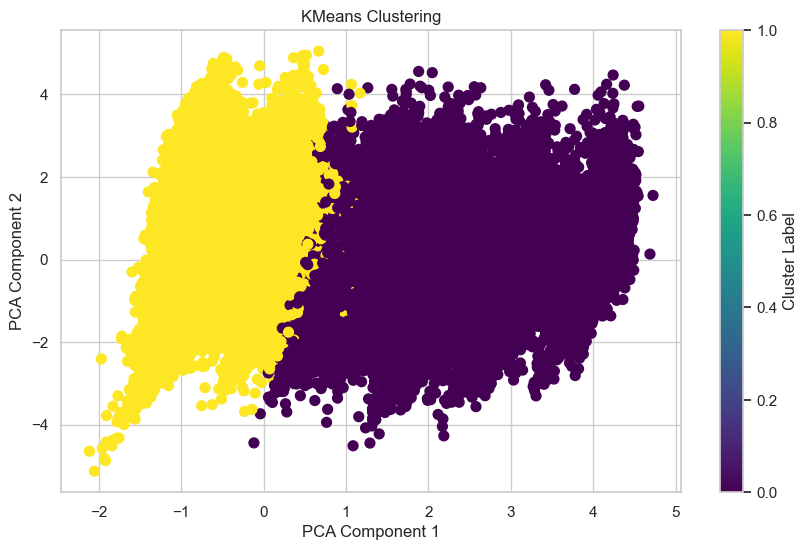

KMeans Silhouette Score: 0.1891842425144994
KMeans Calinski-Harabasz Score: 27221.352105782236
KMeans Davies-Bouldin Score: 2.326509585469765


In [23]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_ch_score = calinski_harabasz_score(X, kmeans_labels)
kmeans_db_score = davies_bouldin_score(X, kmeans_labels)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"KMeans Calinski-Harabasz Score: {kmeans_ch_score}")
print(f"KMeans Davies-Bouldin Score: {kmeans_db_score}")